# Settyl Assignment

In [3]:
#Importing Necassary Libraries
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import average_precision_score
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\jayas\Downloads\Dataset.csv")

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# print the shape of the dataset
print("Shape of the dataset")
print("-"*30)
print(df.shape)

Shape of the dataset
------------------------------
(541909, 8)


In [7]:
# print the Info of the dataset
print("Info about the dataset")
print("-"*30)
print(df.info())

Info about the dataset
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [8]:
# print the Missing values in the dataset
print("Missing Values")
print("-"*30)
print(df.isnull().sum())

Missing Values
------------------------------
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
# Finding the duplicates in dataset
print(df.duplicated(keep=False).sum())

10147


In [10]:
print(df.nunique())

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [11]:
# Missing values percentage
CustomerID_missing_percentage = df['CustomerID'].isnull().sum() / df.shape[0] * 100
print("Percentage of CustomerID missing Values")
CustomerID_missing_percentage.round()

Percentage of CustomerID missing Values


25.0

In [13]:
# Filter rows based on missing values in the Description column
rows_with_missing_description = df[df['Description'].isnull()]
rows_with_missing_description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [14]:
rows_with_missing_and_zero_price = df[df['Description'].isnull() & df['CustomerID'].isnull() & (df['UnitPrice'] == 0.0)]
rows_with_missing_and_zero_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [16]:
# drop rows with missing values or null values
df = df.dropna()

In [17]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [18]:
print(df.duplicated(keep=False).sum())

10062


In [19]:
# drop duplicates
df = df.drop_duplicates()

In [20]:
print(df.duplicated(keep=False).sum())

0


In [21]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
zero_unit_price_count = (df['UnitPrice'] == 0.0).sum()
print("Number of occurrences where UnitPrice is 0.0:", zero_unit_price_count)

Number of occurrences where UnitPrice is 0.0: 40


In [22]:
# Filter rows based on UnitPrice is 0.0
df = df[df.UnitPrice != 0.0]

In [23]:
# Filter rows based on Quantity is less than 0 or Cancelled rows
canceled_orders = df[df['InvoiceNo'].str.startswith('C') & (df['Quantity'] < 0)]
print("Canceled Orders:")
canceled_orders

Canceled Orders:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [24]:
df = df[df['Quantity'] > 0 ]

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB
None


Type Converstion

In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceNo'] = df['InvoiceNo'].astype(int)

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  int32         
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int32         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(3)
memory usage: 24.0+ MB
None


In [28]:
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692,392692.000000,392692.000000
mean,560590.875047,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865
min,536365.000000,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,549234.000000,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,561874.000000,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,572061.000000,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,581587.000000,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,13087.063759,180.492832,NaN,22.241836,1713.539549


In [29]:
# Group by StockCode and choose the most common description
stockcode_to_description_dict = df.groupby('StockCode')['Description'].apply(lambda x: x.value_counts().idxmax()).to_dict()
duplicate_stockcodes = df[df.duplicated(subset=['StockCode'], keep=False)]
stockcode_to_description = duplicate_stockcodes.groupby('StockCode')['Description'].apply(lambda x: x.value_counts().idxmax())
df['Description'] = df['StockCode'].map(stockcode_to_description_dict)

In [30]:
start_date = df.InvoiceDate.min()
end_date = df.InvoiceDate.max()
period = end_date - start_date

print("Start:", start_date)
print("End:", end_date)
print("Period:", period)

Start: 2010-12-01 08:26:00
End: 2011-12-09 12:50:00
Period: 373 days 04:24:00


In [31]:
print("Total number of Countries:\n" + str(df["Country"].nunique()))

Total number of Countries:
37


# Data Visulization

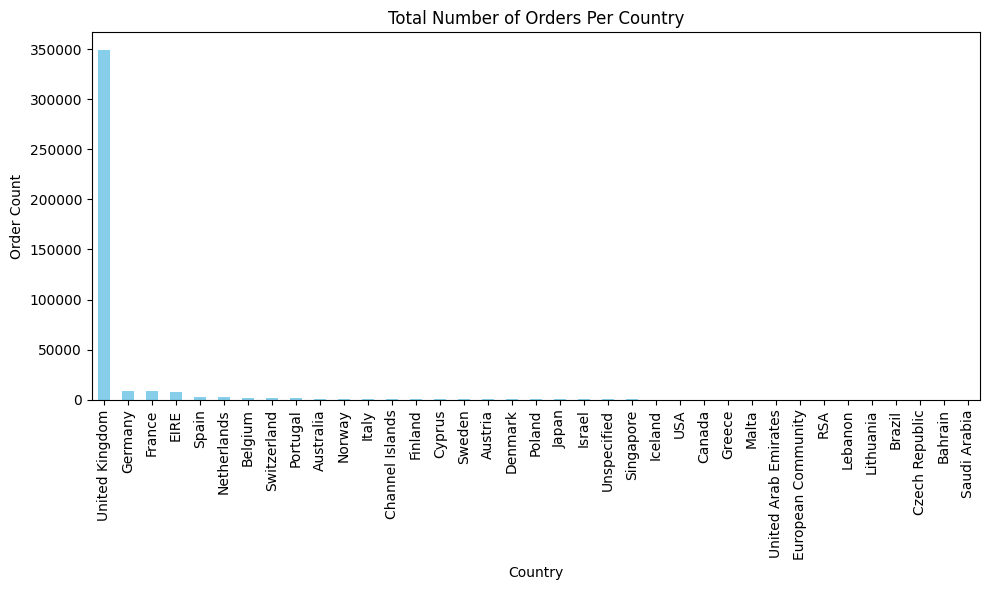

In [30]:
# Number of orders per country
countries = df['Country'].value_counts()
plt.figure(figsize=(10, 6))
countries.plot(kind='bar', color='skyblue')
plt.title('Total Number of Orders Per Country')
plt.xlabel('Country')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

In [35]:
df["Revenue"] = df["UnitPrice"] * df["Quantity"]
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
517009,580025,23583,LUNCH BAG PAISLEY PARK,1,2011-12-01 11:53:00,1.65,15021,United Kingdom,1.65
37490,539468,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,8,2010-12-19 13:31:00,2.95,15044,United Kingdom,23.60
95652,544462,22561,WOODEN SCHOOL COLOURING SET,6,2011-02-20 14:21:00,1.65,17050,United Kingdom,9.90
158624,550303,20977,36 PENCILS TUBE WOODLAND,16,2011-04-17 10:21:00,1.25,18213,United Kingdom,20.00
339327,566588,23312,VINTAGE CHRISTMAS GIFT SACK,12,2011-09-13 14:42:00,4.15,17562,United Kingdom,49.80
418421,572721,35953,FOLKART STAR CHRISTMAS DECORATIONS,48,2011-10-25 15:07:00,0.39,16201,United Kingdom,18.72
260226,559804,22427,ENAMEL FLOWER JUG CREAM,3,2011-07-12 14:17:00,5.95,17405,United Kingdom,17.85
452229,575329,23439,HAND WARMER RED LOVE HEART,1,2011-11-09 13:50:00,2.10,17038,United Kingdom,2.10
485424,577601,23209,LUNCH BAG VINTAGE DOILY,10,2011-11-21 08:31:00,1.65,17675,United Kingdom,16.50
503575,578928,22550,HOLIDAY FUN LUDO,3,2011-11-27 12:29:00,3.75,15443,United Kingdom,11.25


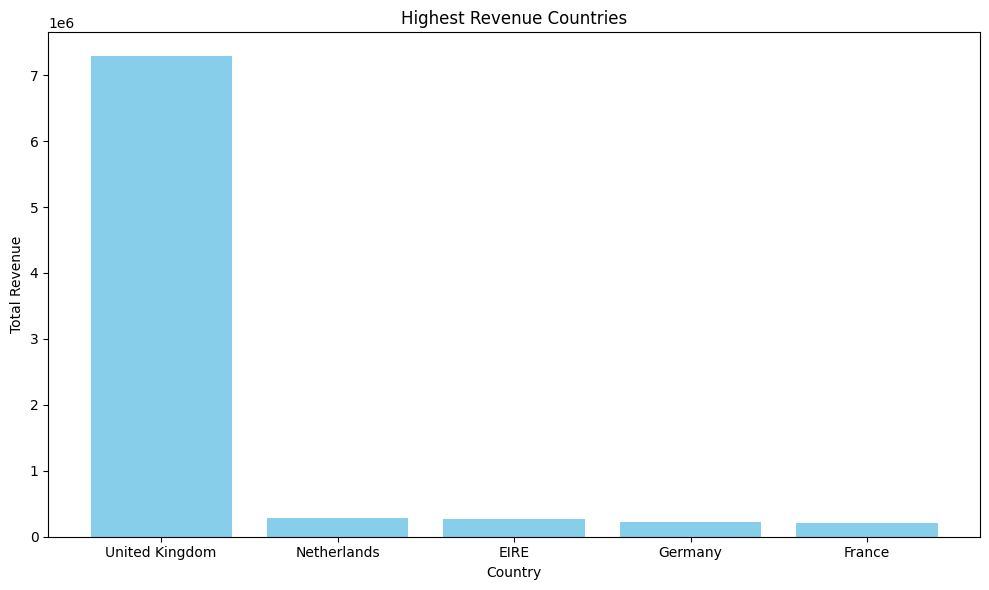

In [32]:
# Total Revenue per Country based on top 5 countries
highest_revenue_countries = df.groupby(['Country'])['Revenue'].sum().reset_index()
highest_revenue_countries = highest_revenue_countries.sort_values(by=["Revenue"], ascending=False)
top_countries = highest_revenue_countries.head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country'], top_countries['Revenue'], color='skyblue')
plt.title('Highest Revenue Countries')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

In [33]:
print("Total number of Products:\n" + str(df["StockCode"].nunique()))

Total number of Products:
3665


In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [42]:
most_sold_items = df.groupby('Description')['Quantity'].sum().reset_index()
most_sold_items = most_sold_items.merge(
    df.groupby('Description')['Revenue'].sum().reset_index(),
    on='Description'
)
most_sold_items = most_sold_items.sort_values(by="Revenue", ascending=False)

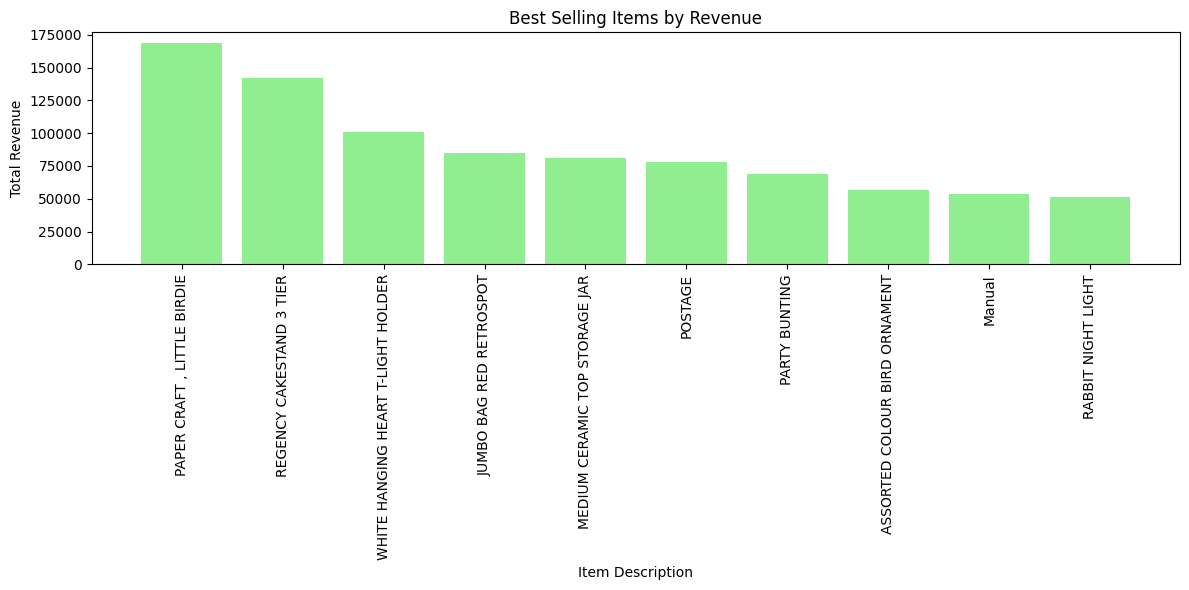

In [43]:
# Best Selling Items based on Revenue
plt.figure(figsize=(12, 6))
plt.bar(most_sold_items.head(10)['Description'], most_sold_items.head(10)['Revenue'], color='lightgreen')
plt.title('Best Selling Items by Revenue')
plt.xlabel('Item Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

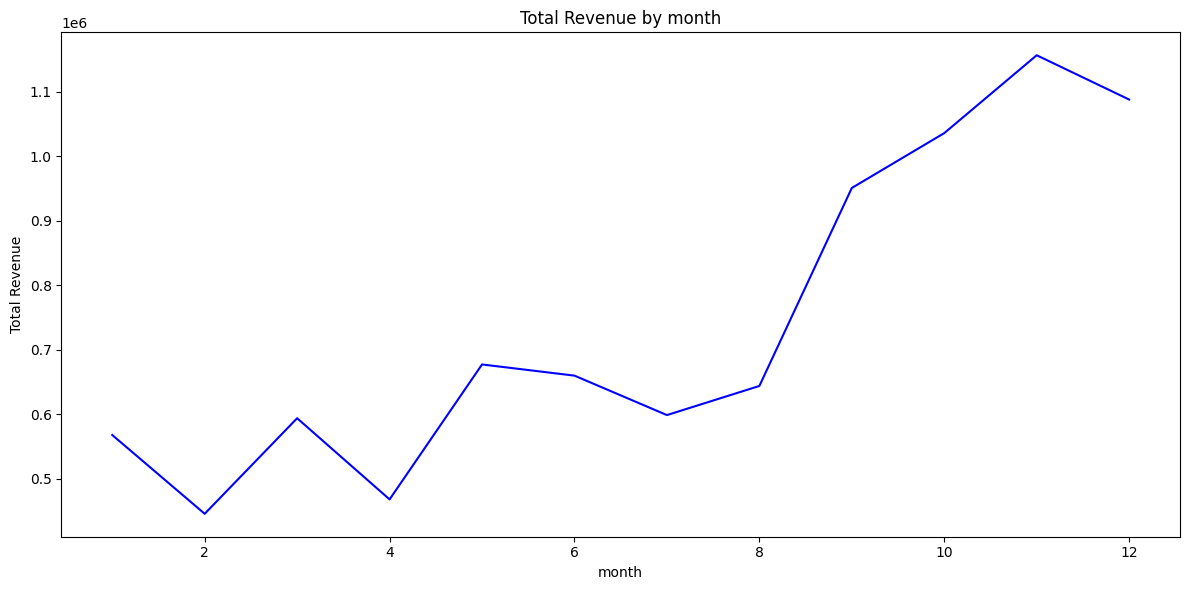

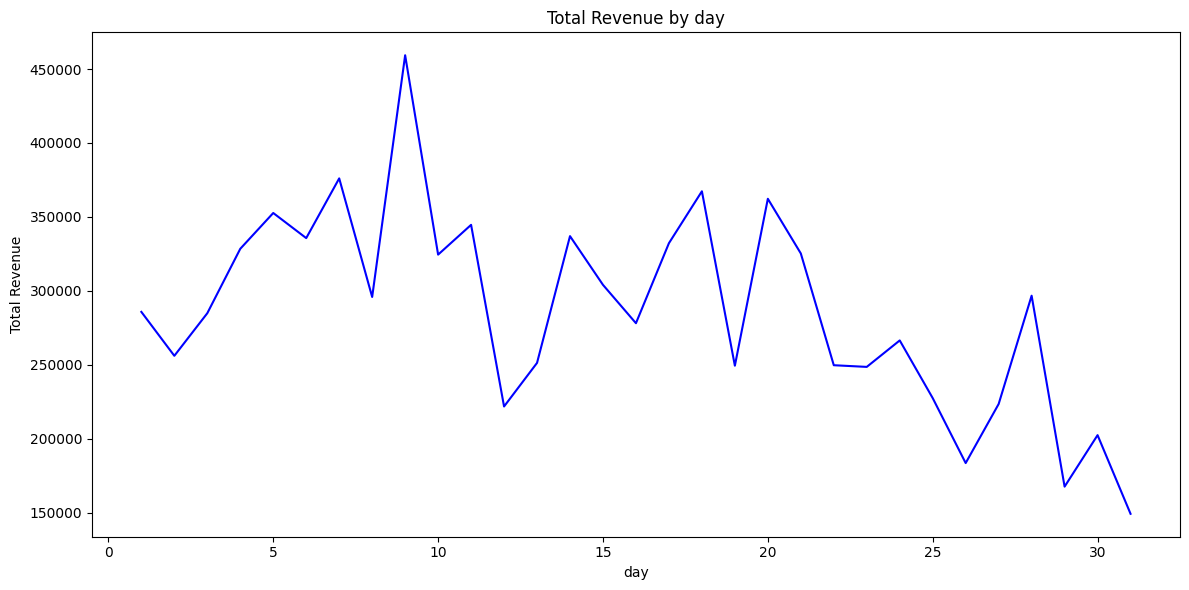

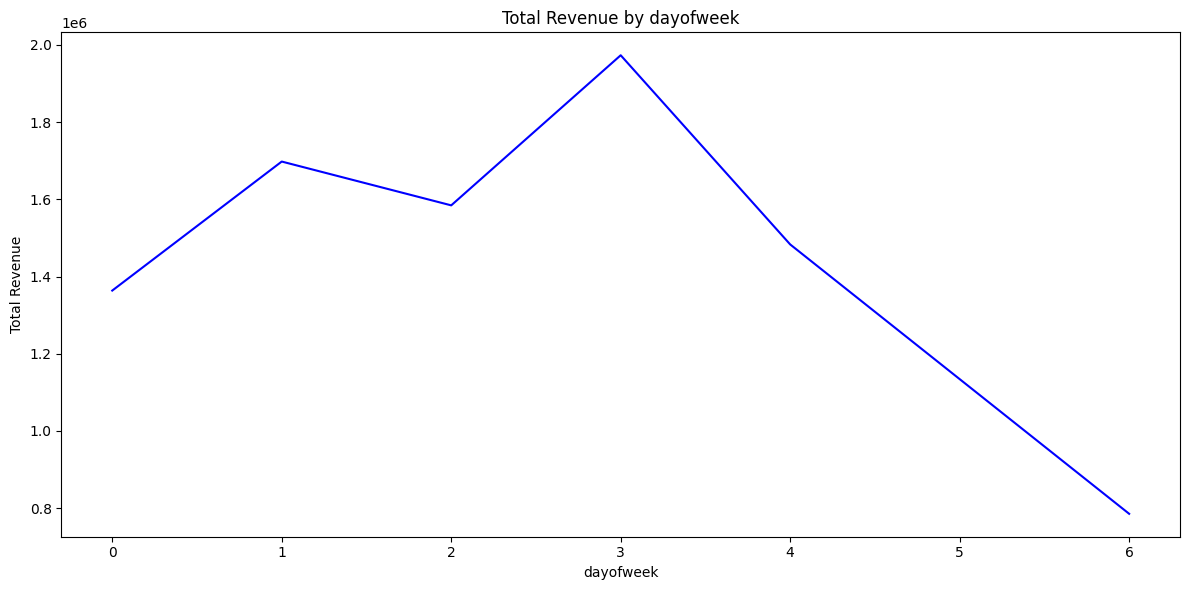

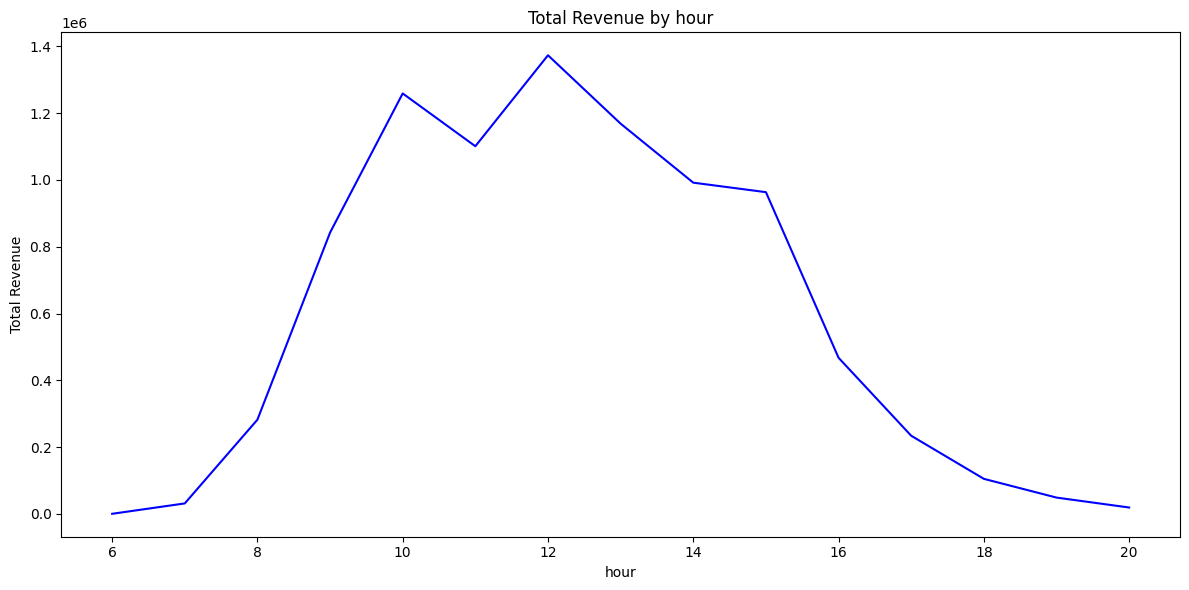

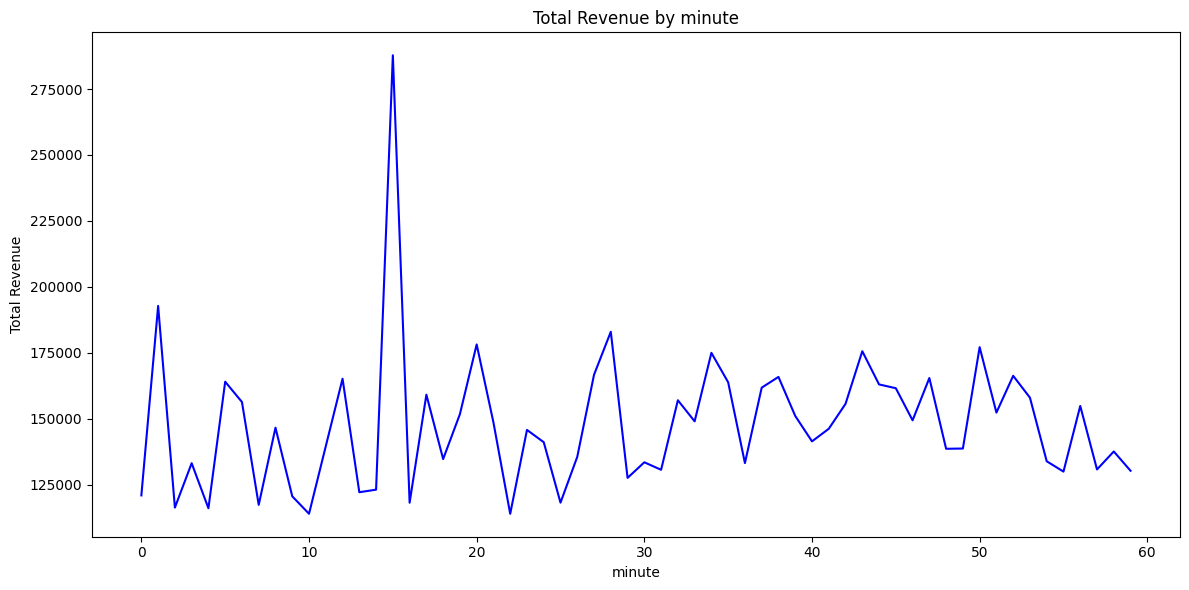

In [44]:
# Total Revenue by Month, Day, Day of Week, Hour, Minute
exploratory_columns = ['month', 'day', 'dayofweek', 'hour', 'minute']
for column in exploratory_columns:
    temp = df.groupby(df['InvoiceDate'].dt.__getattribute__(column))['Revenue'].sum()
    plt.figure(figsize=(12, 6))
    plt.plot(temp.index, temp, color='blue')
    plt.title(f'Total Revenue by {column}')
    plt.xlabel(column)
    plt.ylabel('Total Revenue')
    plt.tight_layout()
    plt.show()

In [43]:
print("Total number of clients:\n" + str(df["CustomerID"].nunique()))

Total number of clients:
4338


In [45]:
customer_summary = df.groupby(['CustomerID'])[['Quantity', 'Revenue']].sum().reset_index()
sorted_by_quantity = customer_summary.sort_values(by=["Quantity"], ascending=False)
sorted_by_revenue = customer_summary.sort_values(by=["Revenue"], ascending=False)
top_customers_by_quantity = sorted_by_quantity.head(10)
top_customers_by_revenue = sorted_by_revenue.head(10)

In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [46]:
print("Total number of Orders:\n" + str(df["InvoiceNo"].nunique()))

Total number of Orders:
18532


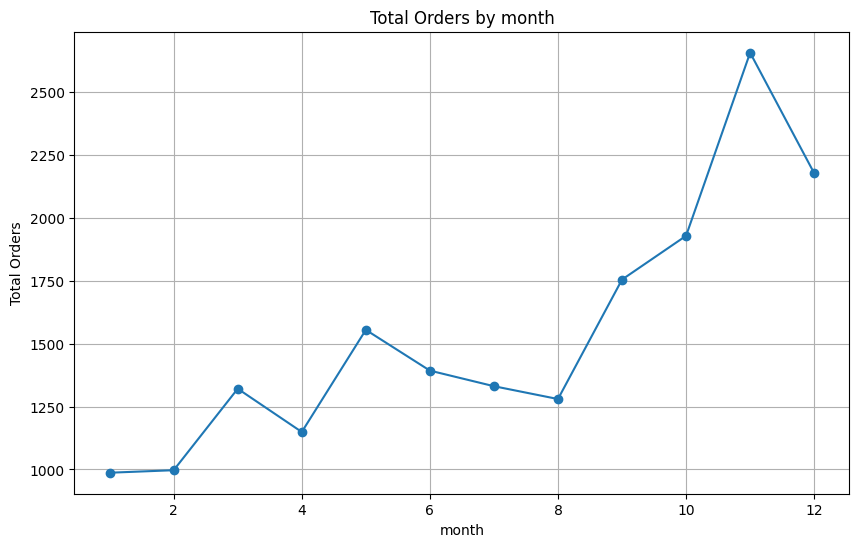

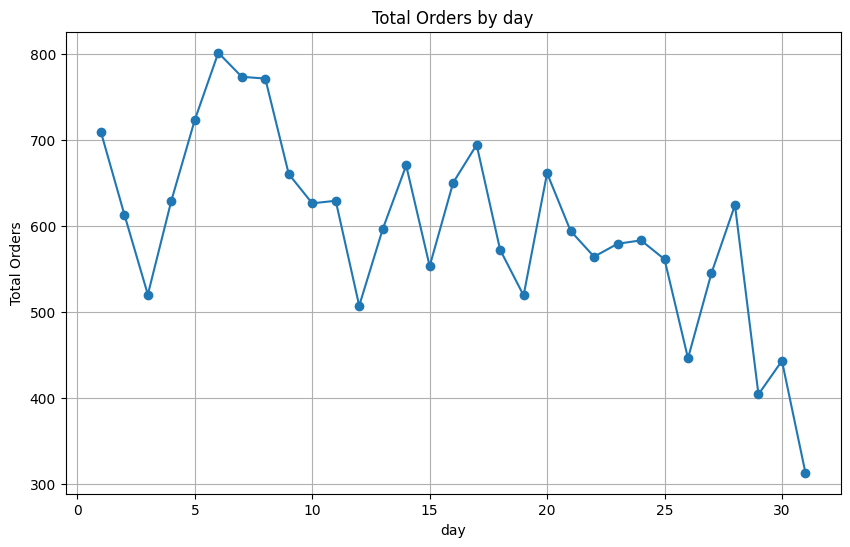

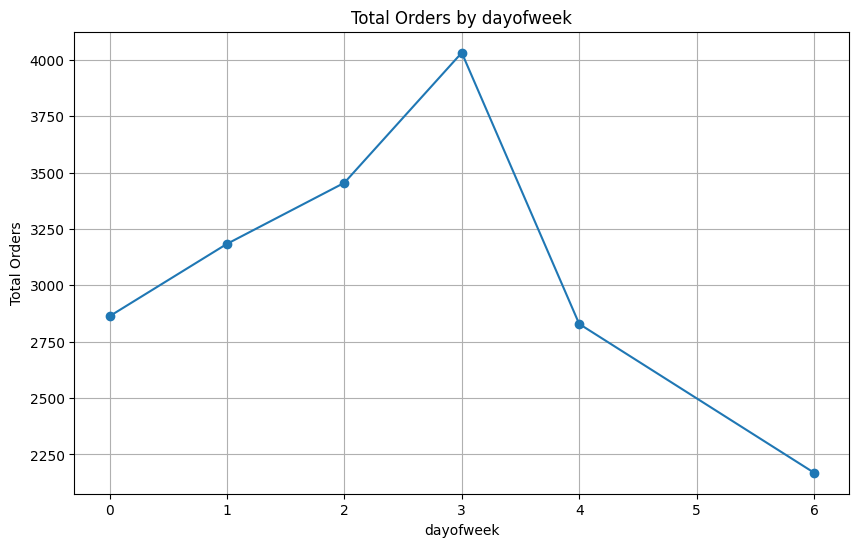

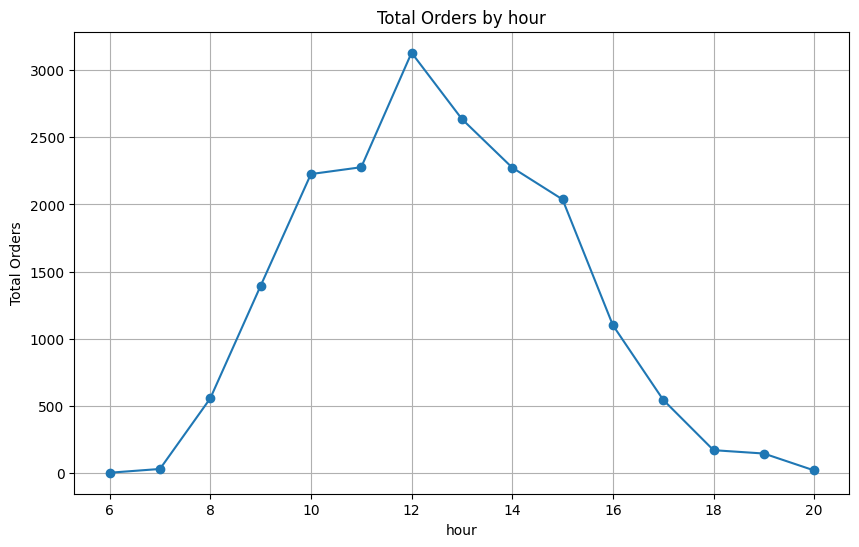

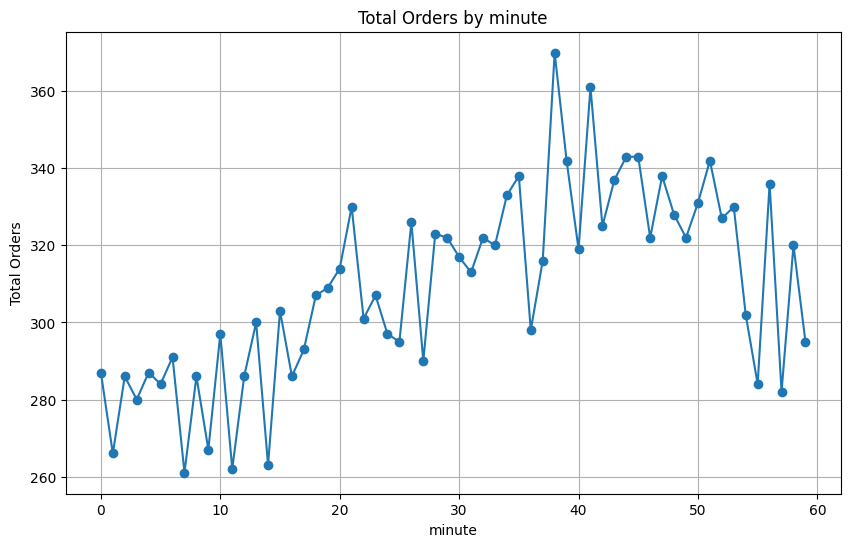

In [46]:
# Number of Orders per  Month, Day, Day of Week, Hour, Minute
exploratory_columns = ['month', 'day', 'dayofweek', 'hour', 'minute']
for column in exploratory_columns:
    temp = df.groupby(df['InvoiceDate'].dt.__getattribute__(column))['InvoiceNo'].nunique()
    plt.figure(figsize=(10, 6))
    plt.plot(temp.index, temp.values, marker='o')
    plt.title(f'Total Orders by {column}')
    plt.xlabel(column)
    plt.ylabel('Total Orders')
    plt.grid(True)
    plt.show()

In [47]:
df = df.sort_values('InvoiceDate')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED RETROSPOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047,United Kingdom,14.85


In [48]:
split_date = df['InvoiceDate'].max() - pd.DateOffset(days=30)
past_data = df[df['InvoiceDate'] <= split_date]
future_data = df[df['InvoiceDate'] > split_date]

In [49]:
user_item_matrix = past_data.pivot_table(index='CustomerID', columns='Description', values='Quantity', fill_value=0)
user_item_matrix

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
user_similarity = cosine_similarity(user_item_matrix)

Recommendations

In [51]:
# Calculate recommendation scores based on past data
def get_recommendations_cosine(user_id, num_recommendations = 5):
    user_index = user_item_matrix.index.get_loc(user_id)
    user_similarities = user_similarity[user_index]
    recommendation_scores = user_similarities.dot(user_item_matrix.values)
    recommended_indices = recommendation_scores.argsort()[-num_recommendations:][::-1]
    return user_item_matrix.columns[recommended_indices]

In [52]:
common_user_ids = set(past_data['CustomerID']).intersection(set(future_data['CustomerID']))

In [54]:
# Recommendation for Randomly Selected User ID
random_user_id = random.choice(list(common_user_ids))
past_recommendations = get_recommendations_cosine(random_user_id)
actual_future_purchases = future_data[future_data['CustomerID'] == random_user_id]['Description'].unique()
correct_recommendations = set(past_recommendations) & set(actual_future_purchases)
true_positives = len(set(past_recommendations) & set(actual_future_purchases))
precision = true_positives / len(past_recommendations)
recall = true_positives / len(actual_future_purchases)
print("Evaluation for Randomly Selected User ID:", random_user_id)
print("------------------------------------------------")
print("Past Recommendations:")
for i, recommendation in enumerate(past_recommendations, start=1):
    print(f"{i}. {recommendation}")

print("\nActual Future Purchases:")
for i, purchase in enumerate(actual_future_purchases, start=1):
    print(f"{i}. {purchase}")

print("\nCorrect Recommendations:")
for i, recommendation in enumerate(correct_recommendations, start=1):
    print(f"{i}. {recommendation}")

print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Evaluation for Randomly Selected User ID: 18130
------------------------------------------------
Past Recommendations:
1. PACK OF 72 RETROSPOT CAKE CASES
2. 60 TEATIME FAIRY CAKE CASES
3. PACK OF 60 PINK PAISLEY CAKE CASES
4. PACK OF 72 SKULL CAKE CASES
5. 72 SWEETHEART FAIRY CAKE CASES

Actual Future Purchases:
1. WRAP CHRISTMAS VILLAGE
2. ROLL WRAP 50'S CHRISTMAS
3. ROLL WRAP 50'S RED CHRISTMAS 
4. 6 GIFT TAGS 50'S CHRISTMAS 
5. VINTAGE CHRISTMAS STOCKING 
6. ROLL WRAP VINTAGE CHRISTMAS
7. CHRISTMAS TREE HANGING GOLD
8. SET OF 6 T-LIGHTS SANTA
9. CHRISTMAS TREE HANGING SILVER 
10. CHERUB HEART DECORATION SILVER 
11. RABBIT NIGHT LIGHT
12. THREE MINI HANGING FRAMES
13. ROTATING SILVER ANGELS T-LIGHT HLDR
14. REINDEER HEART DECORATION GOLD
15. CHERUB HEART DECORATION GOLD
16. VINTAGE CHRISTMAS GIFT SACK
17. JINGLE BELL HEART ANTIQUE SILVER
18. SWEETHEART WALL TIDY 
19. RED RETROSPOT MINI CASES
20. JINGLE BELL HEART ANTIQUE GOLD
21. PINK HAPPY BIRTHDAY BUNTING
22. PRETTY HANGING QUILTED

In [55]:
# Calculate Mean Average Precision, Precision, and Recall for all common users
total_average_precision = 0
num_users_evaluated = 0
total_true_positives = 0
total_past_recommendations = 0
total_actual_future_purchases = 0

for user_id in common_user_ids:
    past_recommendations = get_recommendations_cosine(user_id)
    actual_future_purchases = future_data[future_data['CustomerID'] == user_id]['Description'].unique()
    if len(past_recommendations) == 0 or len(actual_future_purchases) == 0:
        print(f"Skipping user {user_id} - No recommendations or future purchases.")
        continue
    average_precision = 0
    num_correct_recommendations = 0
    for i, recommendation in enumerate(past_recommendations, start=1):
        if recommendation in actual_future_purchases:
            num_correct_recommendations += 1
            average_precision += num_correct_recommendations / i

    if num_correct_recommendations > 0:
        average_precision /= num_correct_recommendations
    total_average_precision += average_precision
    num_users_evaluated += 1
    true_positives = len(set(past_recommendations) & set(actual_future_purchases))
    total_true_positives += true_positives
    total_past_recommendations += len(past_recommendations)
    total_actual_future_purchases += len(actual_future_purchases)
mean_average_precision = total_average_precision / num_users_evaluated if num_users_evaluated > 0 else 0
total_precision = total_true_positives / total_past_recommendations if total_past_recommendations > 0 else 0
total_recall = total_true_positives / total_actual_future_purchases if total_actual_future_purchases > 0 else 0
print("\nOverall Model Metrics:")
print("----------------------")
print(f"Mean Average Precision: {mean_average_precision:.2f}")
print(f"Total Precision: {total_precision:.2f}")
print(f"Total Recall: {total_recall:.2f}")


Overall Model Metrics:
----------------------
Mean Average Precision: 0.34
Total Precision: 0.16
Total Recall: 0.02


In [56]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [57]:
# Calculating Overall Metrics
total_average_precision = 0
num_users_evaluated = 0
total_true_positives = 0
total_past_recommendations = 0
total_actual_future_purchases = 0

for user_id in common_user_ids:
    past_recommendations = get_recommendations_cosine(user_id)
    actual_future_purchases = future_data[future_data['CustomerID'] == user_id]['Description'].unique()
    average_precision = 0
    num_correct_recommendations = 0
    for i, recommendation in enumerate(past_recommendations, start=1):
        if recommendation in actual_future_purchases:
            num_correct_recommendations += 1
            average_precision += num_correct_recommendations / i
    if num_correct_recommendations > 0:
        average_precision /= num_correct_recommendations

    total_average_precision += average_precision
    num_users_evaluated += 1
    true_positives = len(set(past_recommendations) & set(actual_future_purchases))
    total_true_positives += true_positives
    total_past_recommendations += len(past_recommendations)
    total_actual_future_purchases += len(actual_future_purchases)
mean_average_precision = total_average_precision / num_users_evaluated
total_precision = total_true_positives / total_past_recommendations
total_recall = total_true_positives / total_actual_future_purchases
print("\nOverall Model Metrics:")
print("----------------------")
print(f"Mean Average Precision: {mean_average_precision:.2f}")
print(f"Total Precision: {total_precision:.2f}")
print(f"Total Recall: {total_recall:.2f}")


Overall Model Metrics:
----------------------
Mean Average Precision: 0.34
Total Precision: 0.16
Total Recall: 0.02


In [58]:
# Saving the Datasets
past_data.to_csv('past_data.csv')
future_data.to_csv('future_data.csv')

In [59]:
# Creating a user-item matrix
user_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)
user_item_matrix

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.25
12349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
18281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
18282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [60]:
user_item_array = user_item_matrix.to_numpy()
item_item_similarity = 1 - pairwise_distances(user_item_array.T, metric='jaccard')

c:\Users\jayas\OneDrive\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [61]:
# Recomdendations based on similar Items
def recommend_similar_items(item_id, n=10):
    item_index = user_item_matrix.columns.get_loc(item_id)
    similar_items_indices = item_item_similarity[item_index].argsort()[::-1][1:n+1]
    similar_item_codes = list(user_item_matrix.columns[similar_items_indices])
    similar_items_df = df[df['StockCode'].isin(similar_item_codes)][['StockCode', 'Description']]
    similar_items_df = similar_items_df.drop_duplicates(subset=['StockCode']).reset_index(drop=True)
    return similar_items_df

In [62]:
# Recomendation based on Id
item_id = '85123A'
recommended_items_df = recommend_similar_items(item_id, n=10)
print("Recommended similar items for", item_id, ":\n", recommended_items_df)

Recommended similar items for 85123A :
   StockCode                        Description
0     84879      ASSORTED COLOUR BIRD ORNAMENT
1    82494L        WOODEN FRAME ANTIQUE WHITE 
2     82482  WOODEN PICTURE FRAME WHITE FINISH
3     21733   RED HANGING HEART T-LIGHT HOLDER
4     22470              HEART OF WICKER LARGE
5     22457    NATURAL SLATE HEART CHALKBOARD 
6     22469              HEART OF WICKER SMALL
7     22804    CANDLEHOLDER PINK HANGING HEART
8     47566                      PARTY BUNTING
9     23321        SMALL WHITE HEART OF WICKER


In [63]:
item_id = 'POST'
recommended_items_df = recommend_similar_items(item_id, n=10)
print("Recommended similar items for", item_id, ":\n", recommended_items_df)

Recommended similar items for POST :
   StockCode                          Description
0     21731        RED TOADSTOOL LED NIGHT LIGHT
1     22631             CIRCUS PARADE LUNCH BOX 
2     22326  ROUND SNACK BOXES SET OF4 WOODLAND 
3     22629                  SPACEBOY LUNCH BOX 
4     20750             RED RETROSPOT MINI CASES
5     22328   ROUND SNACK BOXES SET OF 4 FRUITS 
6     22551             PLASTERS IN TIN SPACEBOY
7     22554     PLASTERS IN TIN WOODLAND ANIMALS
8     22556       PLASTERS IN TIN CIRCUS PARADE 
9     20719               WOODLAND CHARLOTTE BAG


In [64]:
# Overall Metrics
precision_scores = []
recall_scores = []
map_scores = []
train_data, test_data = train_test_split(df, test_size=0.2, shuffle = True, random_state=0)
for customer_id in test_data['CustomerID'].unique():
    user_test_data = test_data[test_data['CustomerID'] == customer_id]
    true_interactions = set(user_test_data['StockCode'])
    recommended_items_df = recommend_similar_items(user_test_data['StockCode'].iloc[0], n=10)
    recommended_items = set(recommended_items_df['StockCode'])
    common_items = true_interactions.intersection(recommended_items)
    if len(common_items) > 0:
        precision = len(common_items) / len(recommended_items)
        recall = len(common_items) / len(true_interactions)
        true_labels = [1 if item in true_interactions else 0 for item in recommended_items_df['StockCode']]
        avg_precision = average_precision_score(true_labels, recommended_items_df.index)
        precision_scores.append(precision)
        recall_scores.append(recall)
        map_scores.append(avg_precision)

avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_map = sum(map_scores) / len(map_scores)
print("\nOverall Model Metrics:")
print("----------------------")
print(f"Mean Average Precision: {avg_map:.2f}")
print(f"Total Precision: {avg_precision:.2f}")
print(f"Total Recall: {avg_recall:.2f}")


Overall Model Metrics:
----------------------
Mean Average Precision: 0.32
Total Precision: 0.17
Total Recall: 0.14


In [65]:
item_mapping = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')
item_mapping

,Description
StockCode,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
71053,WHITE METAL LANTERN
84406B,CREAM CUPID HEARTS COAT HANGER
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...
90214W,"LETTER ""W"" BLING KEY RING"
90214Z,"LETTER ""Z"" BLING KEY RING"
90214T,"LETTER ""T"" BLING KEY RING"


In [66]:
np.savez_compressed('item_item_similarity.npz', data=item_item_similarity)
user_item_matrix.to_csv('user_item_matrix.csv')
item_mapping.to_csv('item_mapping.csv')

In [67]:
basket = df.pivot_table(index='InvoiceNo', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)
basket_sets = basket.applymap(lambda x: True if x > 0 else False)
basket_sets.sample(10)

C:\Users\jayas\AppData\Local\Temp\ipykernel_10648\955830546.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(lambda x: True if x > 0 else False)


StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
540554,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568568,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
539460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
557117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
552277,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
558335,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567154,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
561880,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.017483,(15036)
1,0.015703,(15056BL)
2,0.020397,(15056N)
3,0.013382,(16161P)
4,0.011116,(17003)
...,...,...
1026,0.011116,"(23202, 23209, 23203)"
1027,0.012195,"(23202, 23203, 85099B)"
1028,0.010900,"(85099B, 23209, 23203)"
1029,0.010414,"(20728, 20725, 22384, 20727)"


In [69]:
# One Hot Encoder
one_hot_encoded = pd.get_dummies(df['StockCode'])
one_hot_encoded = one_hot_encoded.groupby(df['InvoiceNo']).sum()
one_hot_encoded = one_hot_encoded.astype(bool).astype(int)
print(one_hot_encoded.head())

           10002  10080  10120  10123C  10124A  10124G  10125  10133  10135  \
InvoiceNo                                                                     
536365         0      0      0       0       0       0      0      0      0   
536366         0      0      0       0       0       0      0      0      0   
536367         0      0      0       0       0       0      0      0      0   
536368         0      0      0       0       0       0      0      0      0   
536369         0      0      0       0       0       0      0      0      0   

           11001  ...  90214V  90214W  90214Y  90214Z  BANK CHARGES  C2  DOT  \
InvoiceNo         ...                                                          
536365         0  ...       0       0       0       0             0   0    0   
536366         0  ...       0       0       0       0             0   0    0   
536367         0  ...       0       0       0       0             0   0    0   
536368         0  ...       0       0       0 

In [74]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [75]:
# Applying FpGrowth due to Large Dataset
basket = df.groupby(['InvoiceNo', 'StockCode']).size().unstack(fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)

C:\Users\jayas\AppData\Local\Temp\ipykernel_10648\1605898811.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
c:\Users\jayas\OneDrive\Desktop\New folder\venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [76]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)

       support        itemsets  length
0     0.106734        (85123A)       1
1     0.017321        (84029E)       1
2     0.017213        (84029G)       1
3     0.016026         (22752)       1
4     0.013490         (71053)       1
...        ...             ...     ...
1026  0.010253  (23295, 23296)       2
1027  0.010900  (23294, 23293)       2
1028  0.010414  (23295, 23294)       2
1029  0.011763  (23355, 23356)       2
1030  0.010954  (22865, 23439)       2

[1031 rows x 3 columns]


In [92]:
from mlxtend.frequent_patterns import association_rules
num_itemsets = len(frequent_itemsets)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=num_itemsets)
rules = rules.sort_values(by='lift', ascending=False)
print(rules.head())

         antecedents     consequents  antecedent support  consequent support  \
1088         (23172)         (23171)            0.012087            0.014569   
1089         (23171)         (23172)            0.014569            0.012087   
765          (22746)  (22748, 22745)            0.013598            0.013706   
764   (22748, 22745)         (22746)            0.013706            0.013598   
1084         (23175)         (23174)            0.014677            0.014461   

       support  confidence       lift  representativity  leverage  conviction  \
1088  0.010900    0.901786  61.895899               1.0  0.010724   10.033475   
1089  0.010900    0.748148  61.895899               1.0  0.010724    3.922595   
765   0.010037    0.738095  53.851894               1.0  0.009850    3.765850   
764   0.010037    0.732283  53.851894               1.0  0.009850    3.684501   
1084  0.011116    0.757353  52.370391               1.0  0.010904    4.061613   

      zhangs_metric   jaccard  c

In [93]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

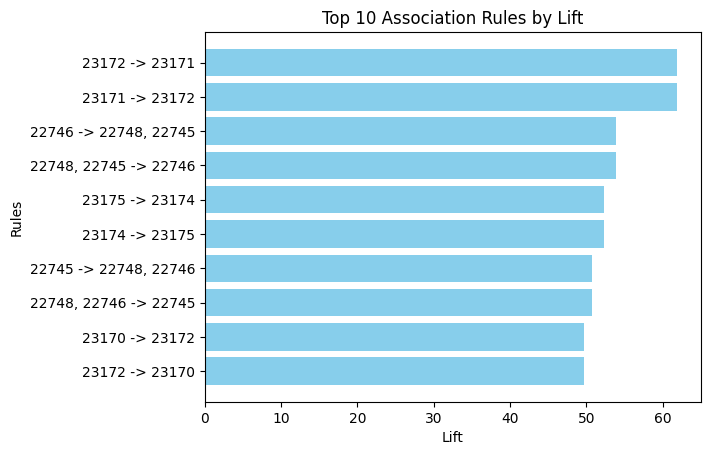

In [94]:
# Plotting top rules
top_rules = rules.head(10)
plt.barh(top_rules['antecedents'] + " -> " + top_rules['consequents'], top_rules['lift'], color='skyblue')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()

In [100]:
# Recomendation Based on Frequently bought Together
def frequently_bought_together(item_id, num_recommendations=5):
    item_id = str(item_id)
    if item_id not in item_mapping.index:
        return f"Item ID {item_id} not found in item_mapping"
    item_description = item_mapping.loc[item_id, 'Description']
    associated_items = rules[rules['antecedents'].apply(lambda x: item_id in x)]
    associated_items = associated_items[associated_items['consequents'].apply(lambda x: item_id not in x)]
    associated_items = associated_items.sort_values('lift', ascending=False).head(num_recommendations)
    recommended_items = associated_items['consequents'].apply(lambda x: [item_mapping.loc[code, 'Description'] for code in x if code != item_id]).tolist()
    recommended_items = [item for sublist in recommended_items for item in sublist]
    return recommended_items, item_description


In [53]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
